# Exam Scores
### *understanding the student position during exams*

Exams are something every student has had to face at somepoint in their lives. Many factors can seemingly affect the marks of students during exams, in this assignment, I wanted to see how the Gender, Parental Education, Lunch, and Test Prep Courses Completion, affect the average grades of students on exams.

In [12]:
# import the basic libraries needed to load, clean and analyse the data
import numpy as np
import pandas as pd 
import matplotlib as mpl
import os 

## Importing The Data
I'm importing this data from a csv file held in the same directory. This is because the source of this data requires and account to download it, so using python to grab it is not ideal.

In [13]:
# loading from csv file on file system
data_file = "exams.csv"

# read and set columns
raw_data = pd.read_csv(data_file)
raw_data.columns = ["gender", "race", "parent_ed", "lunch", "test_prep_course", "math", "reading", "writing"]
raw_data.head()

,gender,race,parent_ed,lunch,test_prep_course,math,reading,writing
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## Data Cleaning
I will remove any potential null values, as well as the race column, since I don't plan on using it for analysis.

In [14]:

# remove null values that might persist
data = raw_data.dropna(axis=0) 

# dropping this column since I don't plan on using it
data = data.drop('race', axis=1)

# lets see what options we have for our non-numeric columns
print("Gender           :", ", ".join(raw_data['gender'].unique()))
print("Parent Educations:", ", ".join(raw_data['parent_ed'].unique()))
print("Lunches          :", ", ".join(raw_data['lunch'].unique()))
print("Test Prep Done   :", ", ".join(raw_data['test_prep_course'].unique()))

Gender           : male, female
Parent Educations: high school, some high school, some college, associate's degree, bachelor's degree, master's degree
Lunches          : standard, free/reduced
Test Prep Done   : completed, none


Now that we can see some of our categorical data, we can further clean it.

I have ranked the parents education level from low to high in two separate dictionaries, the first maps to a modified string so that the string can be sorted properly. The second maps to a numeric value which can be used for statistic analysis.

In [15]:
# a simple ranking for the education level, sorted by STRING
education_ranking_str = {
    'some high school'   : '(1) some high school',
    'high school'        : '(2) high school',
    'some college'       : '(3) some college',
    "associate's degree" : "(4) associate's degree",
    "bachelor's degree"  : "(5) bachelor's degree",
    "master's degree"    : "(6) master's degree"
}

# same ranking as above, but for INTEGERS
education_ranking_num = {
    'some high school'   : 1,
    'high school'        : 2,
    'some college'       : 3,
    "associate's degree" : 4,
    "bachelor's degree"  : 5,
    "master's degree"    : 6
}

# # add a new colum so we can see the parent education value next to the education level
data['parent_ed_num'] = [ education_ranking_num.get(x) for x in data['parent_ed'] ]

# replace the parent education with a scalar value, lower = worse, higher = better
data = data.replace({'parent_ed': education_ranking_str})

data['av_grade'] = data.loc[:, ['math', 'reading', 'writing']].mean(axis=1).round(decimals=3)

# re-order the columns 
data = data[["gender", "parent_ed_num", "parent_ed", "lunch", "test_prep_course", "av_grade"]]

data

,gender,parent_ed_num,parent_ed,lunch,test_prep_course,av_grade
0,male,2,(2) high school,standard,completed,65.667
1,female,1,(1) some high school,free/reduced,none,51.333
2,male,3,(3) some college,free/reduced,none,56.333
3,male,2,(2) high school,standard,none,74.333
4,male,4,(4) associate's degree,standard,completed,73.000
...,...,...,...,...,...,...
995,male,2,(2) high school,standard,none,69.333
996,male,4,(4) associate's degree,free/reduced,completed,89.333
997,female,1,(1) some high school,free/reduced,none,36.000
998,female,3,(3) some college,standard,none,76.333


## Analyses
I will explorer the relationships between parental education, gender, lunch and test prep with exploratory analyses, such as statistical summaries and data visualizations.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,483.0,68.931,14.722,21.667,59.500,68.667,79.667,100.0
male,517.0,66.573,14.237,29.333,56.667,67.000,76.333,100.0


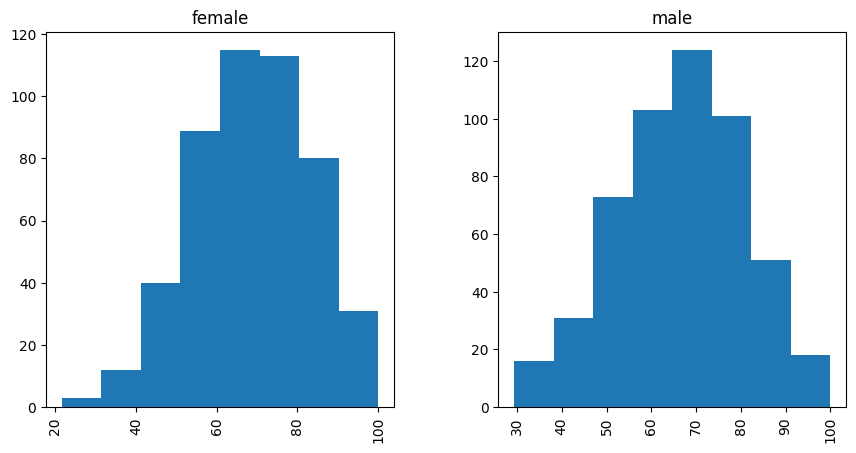

In [16]:
# grade distribution by gender
g = data.av_grade.hist(bins=8, figsize=(10,5), grid=False, by=data['gender'])
dg = data.groupby(['gender']).av_grade.describe().round(decimals=3)
dg

Analysis of the grades by gender reveals that there is little difference in number of male and female students, as well as difference in performance, females performing slightly better on average.

## Parental Education
An examination to see how the education of a students parent effect the marks.

Lets see how the students are distributed by their parents education:

In [31]:
data.groupby(['parent_ed']).size()

parent_ed
(1) some high school      191
(2) high school           202
(3) some college          222
(4) associate's degree    203
(5) bachelor's degree     112
(6) master's degree        70
dtype: int64

A *relatively* even distribution with more parents having some college or more, with the higher the education, there is less parents.

Lets see how the parents education level is affecting student testing marks:

Pearson Correlation: 0.253


,count,mean,std,min,25%,50%,75%,max
parent_ed,,,,,,,,
(1) some high school,191.0,62.550,14.050,29.333,52.834,62.667,72.333,96.333
(2) high school,202.0,65.818,13.389,29.333,58.750,66.166,75.584,95.333
(3) some college,222.0,66.692,15.055,21.667,56.083,67.667,77.000,100.000
(4) associate's degree,203.0,70.212,13.205,37.000,61.500,70.667,79.166,100.000
(5) bachelor's degree,112.0,73.304,14.360,36.667,62.667,73.500,85.500,100.000
(6) master's degree,70.0,74.300,14.674,39.667,64.416,75.500,84.584,100.000


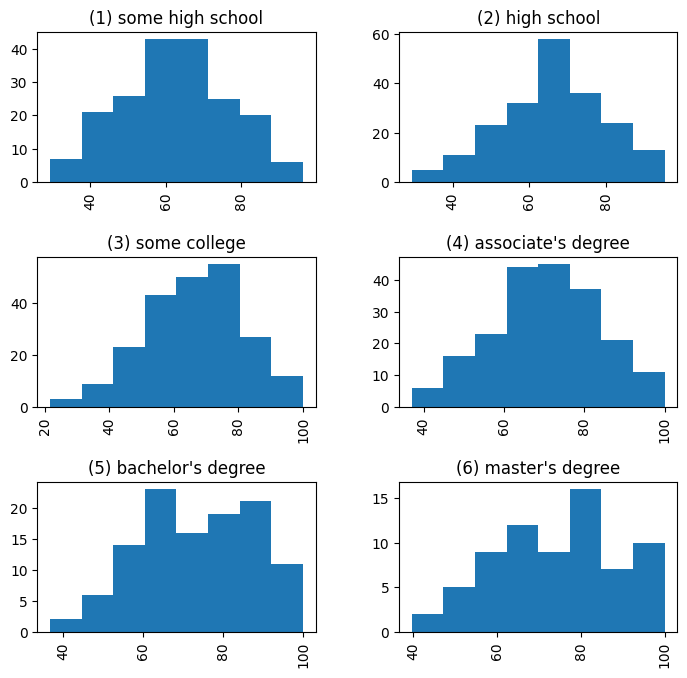

In [30]:
# grade distribution by parental education level
g = data.av_grade.hist(bins=8, figsize=(8,8), grid=False, by=data.parent_ed)
cor = data.parent_ed_num.corr(data.av_grade)
dg = data.groupby(['parent_ed']).av_grade.describe().round(decimals=3)

print(f"Pearson Correlation: {round(cor, 4)}")

dg

From graphical analysis of the grades grouped by parent education level, it can be seen that students who parents are more educated tend to have higher grades on average.

With statistical analysis using Pearson's Correlation coefficient, it can be seen there is a **Weak Positive Correlation** between the parents education level and their grades.

We can see that students did on average **~12%** better when comparing the parents with Master's degree with those who have some high school.

## Test Prep Course Completion
An examination to see how the completion of a test prep course affected student grades.

We will start by getting the distribution of the students groupped by whether they completed the test prep course or not.

In [19]:
data.groupby(['test_prep_course']).size()

test_prep_course
completed    335
none         665
dtype: int64

There is a huge difference in the number of students, almost double did not take the course.

Now we can see how the test prep course affected student grades:

,count,mean,std,min,25%,50%,75%,max
test_prep_course,,,,,,,,
completed,335.0,72.816,13.661,31.667,63.166,73.667,83.000,100.000
none,665.0,65.141,14.258,21.667,55.667,65.333,75.333,96.667


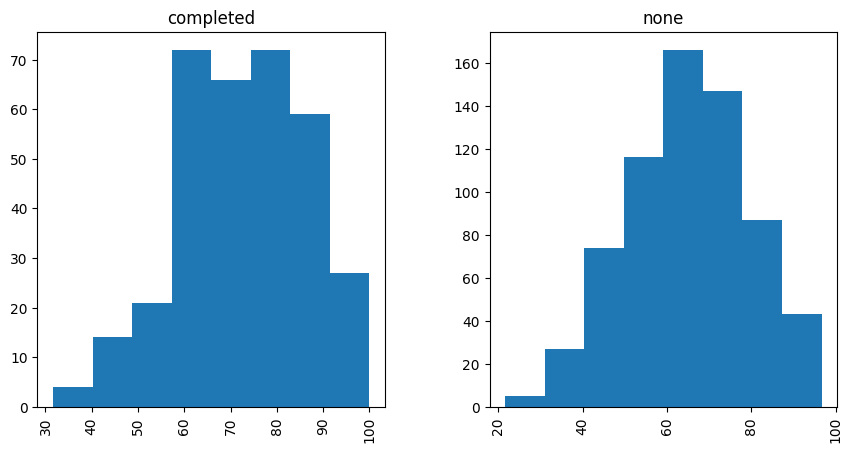

In [27]:
# grade distribution by test prep course completion
g = data.av_grade.hist(bins=8, figsize=(10,5), by=data['test_prep_course'])
dg = data.groupby(['test_prep_course']).av_grade.describe().round(decimals=3)
dg

Through graphical analysis and examination of the description table, it can be seen that students who completed the test prep course did on average **~7%** better than those who did not.

Students who took the course also had much higher lows than students who did not, the lowest mark having completed the course was **~32%**, compared to the lowest without the course of **~22%**. As well as the highest mark without the course being **~97%** compared to the **100%** with.

## Student Lunch 
Lets see how the students lunch affected their test marks, there are only two options for this column being free/reduced and standard, lets get the distribution of them:

In [23]:
data.groupby(['lunch']).size()

lunch
free/reduced    348
standard        652
dtype: int64

Again there is a large difference in distribution, over double the students have a standard lunch than a free/reduced lunch.

Lets see how the student's lunch affected their grades:

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,348.0,60.874,14.276,21.667,50.667,61.500,70.167,96.667
standard,652.0,71.362,13.278,32.667,62.333,71.834,81.000,100.000


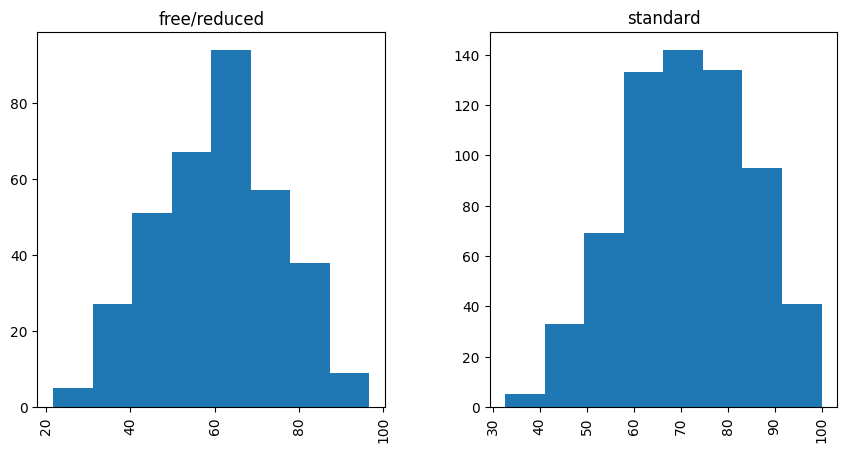

In [28]:
# grade distribution by lunch
g = data.av_grade.hist(bins=8, figsize=(10,5), by=data['lunch'])
dg = data.groupby(['lunch']).av_grade.describe().round(decimals=3)
dg

From the plots and table above, we can see that the lunch the students eat have an impact on their testing performance.

Students getting a free/reduced lunch are performing worse than students who are eating a standard meal. On average there is a difference of **Over 10%** on testing scores for students with a free/reduced lunch, furthermore, the min and max marks of student's differed greatly as well. Student's with a standard lunch have higher lows and higher highs than students with a free/reduced lunch.

The student's lunch seems to have a **bigger** impact on testing scores than whether or not they completed a test prep course.

## Grouping All Factors Together
Lets combine the parent education level, with the student's lunch and completion of the test prep course and see how they compare:

count       mean  \
parent_ed              test_prep_course lunch                            
(1) some high school   completed        free/reduced   22.0  57.454591   
                                        standard       41.0  70.292610   
                       none             free/reduced   45.0  53.674022   
                                        standard       83.0  64.887578   
(2) high school        completed        free/reduced   19.0  69.263158   
                                        standard       38.0  72.763237   
                       none             free/reduced   47.0  55.695021   
                                        standard       98.0  67.312878   
(3) some college       completed        free/reduced   33.0  64.131364   
                                        standard       49.0  76.945571   
                       none             free/reduced   55.0  57.363673   
                                        standard       85.0  67.811729   
(4) associate's degree completed        free/reduced   24.0  72.374958   
                                        standard       51.0  76.013098   
                       none             free/reduced   47.0  62.631170   
                                        standard       81.0  70.316877   
(5) bachelor's degree  completed        free/reduced    8.0  64.625000   
                                        standard       31.0  82.763452   
                       none             free/reduced   24.0  63.333333   
                                        standard       49.0  73.619082   
(6) master's degree    completed        free/reduced    4.0  79.416750   
                                        standard       15.0  84.377867   
                       none             free/reduced   20.0  63.216700   
                                        standard       31.0  75.914000   

                                                            std     min  \
parent_ed              test_prep_course lunch                             
(1) some high school   completed        free/reduced   9.892232  40.000   
                                        standard      14.419946  41.000   
                       none             free/reduced  14.235462  29.333   
                                        standard      11.681765  32.667   
(2) high school        completed        free/reduced  11.693442  48.000   
                                        standard      10.125237  56.000   
                       none             free/reduced  12.105973  29.333   
                                        standard      12.819822  36.333   
(3) some college       completed        free/reduced  13.369893  31.667   
                                        standard      11.086426  48.000   
                       none             free/reduced  15.847511  21.667   
                                        standard      13.205223  42.667   
(4) associate's degree completed        free/reduced  13.861089  42.333   
                                        standard      12.436003  54.000   
                       none             free/reduced  12.636000  37.000   
                                        standard      11.829990  38.000   
(5) bachelor's degree  completed        free/reduced   9.364785  52.333   
                                        standard      11.436229  55.333   
                       none             free/reduced  12.519674  36.667   
                                        standard      13.677300  46.000   
(6) master's degree    completed        free/reduced  12.905373  66.667   
                                        standard      10.604545  67.000   
                       none             free/reduced  13.588333  39.667   
                                        standard      13.051813  48.000   

                                                           25%      50%  \
parent_ed              test_prep_course lunch                             
(1) some high school   compl

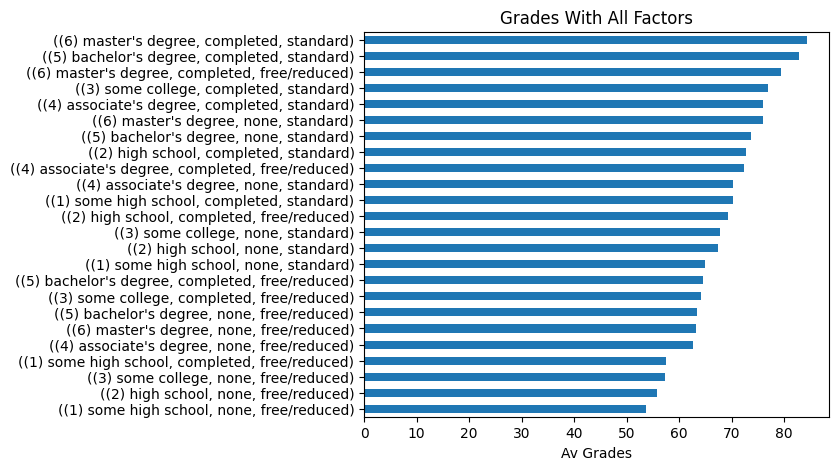

In [34]:

# group in the order we want
dfg = data.groupby(['parent_ed', 'test_prep_course', 'lunch']) \
                                                             .mean(numeric_only=True) \
                                                             .sort_values("av_grade").av_grade

# draw a nice lookin plot to show our results 
p = dfg.plot(kind='barh', title='Grades With All Factors', ylabel='', xlabel='Av Grades', figsize=(6, 5))

# big table below
data.groupby(['parent_ed', 'test_prep_course', 'lunch']).av_grade.describe()

The plot and table above suggest that completing test prep and eating a standard lunch are the **best** factors students can control to increase their marks.

In **every case** when grouping students by their parent's education level, the students who did the test prep and had a standard lunch, did better than those who had either a standard lunch or did only the test prep.

## Discussion

In this assignment, I explored data from Kaggle [[1]](https://www.kaggle.com/code/spscientist/student-performance-in-exams/data) about student performance in exams. I focused on the relationship between various categorical differences between students to see how each one affected their average scores. I looked at how the student's parent's education level, whether or not a student completed a test prep course, and if they had a standard or free/reduced lunch to see the effects on testing scores. Exploratory and statistical analysis supported the hypothesis that these factors had an impact on student scores. I found there is a **weak positive linear correlation** between parent education level and exam marks, as well as a difference of **~12%** in average marks when comparing students with the highest educated parents with the lowest educated parents. This can be seen under the [Parental Education](#Parental-Education) section. Analysis of students who had completed the test prep course also had a difference in testing scores, revealing that students who completed the test course did on average **~7%** better than students who did not. This can be seen under the [Test Prep Course Completion](#Test-Prep-Course-Completion) section. The lunch the student ate had a surprising impact on their testing performance, exploratory analysis revealed that students who had a standard lunch did on average **over 10%** better than students who ate a free/reduced lunch, and also showed **higher lows**, and **higher highs** when looking at the upper and lower bounds of marks. This can be seen under the [Student Lunch](#Student-Lunch) section. The combined analysis shown under the [Grouping All Factors Together](#Grouping-All-Factors-Together) section, further shows the impact of lunch and test prep on exam scores. When comparing students who's parents had the same education, in **every case**, the students with a standard lunch and test prep did better than those who had either a standard lunch, or did only the test prep.

These analyses confirm that exam marks of students can be affected by many factors. The outcomes from the above analysis suggest that students who have a better lunch, have completed a test prep course, and have more educated parents, are much more likely to have better marks during exams. Students wishing to increase exam scores should eat a good lunch and attend test prep whenever possible if they wish to increase their performance on exams.

## References

1. Source data - https://www.kaggle.com/code/spscientist/student-performance-in-exams/data
2. Pandas for data manipulation
3. Matplotlib for data visualization 